In [37]:
import os
import sys
import librosa.display
from matplotlib import rc
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
from src.hparams import HParamsFromYAML
from src.log_mel_features import LogMelSpectrogram
from src.mfcc_features import MfccSpectrogram
sys.path.pop(0)

'..'

In [38]:
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('text', usetex=True)

In [39]:
params = HParamsFromYAML('../hparams.yaml', param_sets=['log_mel'])

In [40]:
AUDIO_FILE_PATH = os.path.join('..', params.datasets_dir, params.train_data_dir, '75923738.wav')
mel = LogMelSpectrogram(params)
S = mel.get_spectrogram(AUDIO_FILE_PATH)

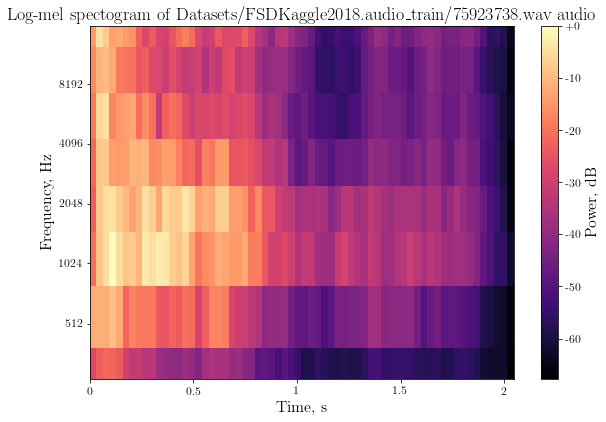

In [41]:
fig = plt.figure(figsize=(9, 6))
plt.subplot()
plt.title('Log-mel spectogram of %s audio' % '/'.join(AUDIO_FILE_PATH.split('/')[1:]).replace('_', '\_'),
		fontsize=18)
librosa.display.specshow(S, sr=params.sample_rate, hop_length=params.hop_length,
		x_axis='time', y_axis='mel', fmin=mel.min_frequency, fmax=mel.max_frequency)
plt.xlabel('Time, s', fontsize=16)
plt.ylabel('Frequency, Hz', fontsize=16)
cbar = plt.colorbar(format='%+2.0f')
cbar.ax.set_ylabel('Power, dB', fontsize=16)

fig.tight_layout(pad=1.0)
#FIG_PATH = os.path.join('..', params.storage_dir, params.features_dir, params.features_type, 'spectogram_example.pdf')
#fig.savefig(FIG_PATH)

In [42]:
params = HParamsFromYAML('../hparams.yaml', param_sets=['mfcc'])

In [45]:
AUDIO_FILE_PATH = os.path.join('..', params.datasets_dir, params.train_data_dir, '75923738.wav')
mfcc = MfccSpectrogram(params)
S = mfcc.get_spectrogram(AUDIO_FILE_PATH)

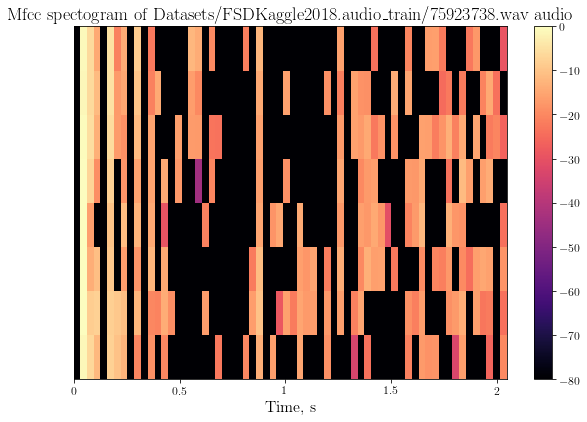

In [44]:
fig = plt.figure(figsize=(9, 6))
plt.subplot()
plt.title('Mfcc spectogram of %s audio' % '/'.join(AUDIO_FILE_PATH.split('/')[1:]).replace('_', '\_'),
		fontsize=18)
librosa.display.specshow(S, sr=params.sample_rate, hop_length=params.hop_length,
		x_axis='time',
                         #y_axis='mel',
                         fmin=mfcc.min_frequency, fmax=mfcc.max_frequency)
plt.xlabel('Time, s', fontsize=16)
#plt.ylabel('Frequency, Hz', fontsize=16)
plt.colorbar()
#cbar = plt.colorbar(format='%+2.0f')
#cbar.ax.set_ylabel('Power, dB', fontsize=16)

fig.tight_layout(pad=1.0)
#FIG_PATH = os.path.join('..', params.storage_dir, params.features_dir, params.features_type, 'spectogram_example.pdf')
#fig.savefig(FIG_PATH)